In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,KFold,cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,confusion_matrix
warnings.filterwarnings('ignore')

In [2]:
data_train = pd.read_csv("carinsurance_train.csv")
data_test = pd.read_csv("carinsurance_test.csv")

In [3]:
data_train

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,28,technician,single,tertiary,0,0,1,0,cellular,25,may,1,40,2,failure,17:46:28,17:50:57,1
3996,3997,49,admin.,divorced,secondary,0,124,1,1,cellular,29,jul,19,-1,0,NaN,14:49:16,14:51:21,0
3997,3998,27,admin.,single,secondary,0,-400,0,1,cellular,8,jul,1,-1,0,NaN,12:19:03,12:23:53,0
3998,3999,36,entrepreneur,single,tertiary,0,658,1,0,cellular,29,jan,1,227,3,failure,11:27:35,11:29:14,0


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

In [5]:
data_train.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [6]:
data_train.describe(include=['O'])

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
count,3981,4000,3831,3098,4000,958,4000,4000
unique,11,3,3,2,12,3,3777,3764
top,management,married,secondary,cellular,may,failure,17:11:04,10:22:30
freq,893,2304,1988,2831,1049,437,3,3


In [7]:
# FUNCTION FOR CORRELATION HEATMAP

def heatmap_corr(df, fig=20, annot=False, filtering=None, sort=True):

    if sort == True:
        cols1=[]
        cols2=[]
        value=[]
        matrix = df.corr()
        for i in range(len(matrix.columns)):
            for j in range(i):
                cols1.append(matrix.columns[i])
                cols2.append(matrix.columns[j])
                value.append(matrix.iloc[i,j])
        new_df = pd.DataFrame({'column_name_1': cols1, 'column_name_2': cols2, 'corr':value})
        new_df.sort_values('corr',ascending=False, inplace=True)
        if filtering != None:
            new_df = new_df[(abs(new_df['corr']) >= filtering)]
        all_cols = []
        cols = []
        for index, row in new_df.iterrows():
            all_cols.append(row.column_name_1)
            all_cols.append(row.column_name_2)
        for col in all_cols:
            if col not in cols:
                cols.append(col)
        final = df[cols]
    else:
        final = df.copy()
    _ , ax = plt.subplots(figsize =(fig, fig))
    colormap = sns.diverging_palette(240, 10,n=9, as_cmap = True)
    _ = sns.heatmap(
        final.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=annot, 
        linewidths=0.1,
        vmin=-1, 
        vmax=1.0, 
        linecolor='white',
        annot_kws={'fontsize':8 }
    )

In [8]:
data_train.drop('Id', axis=1, inplace=True)

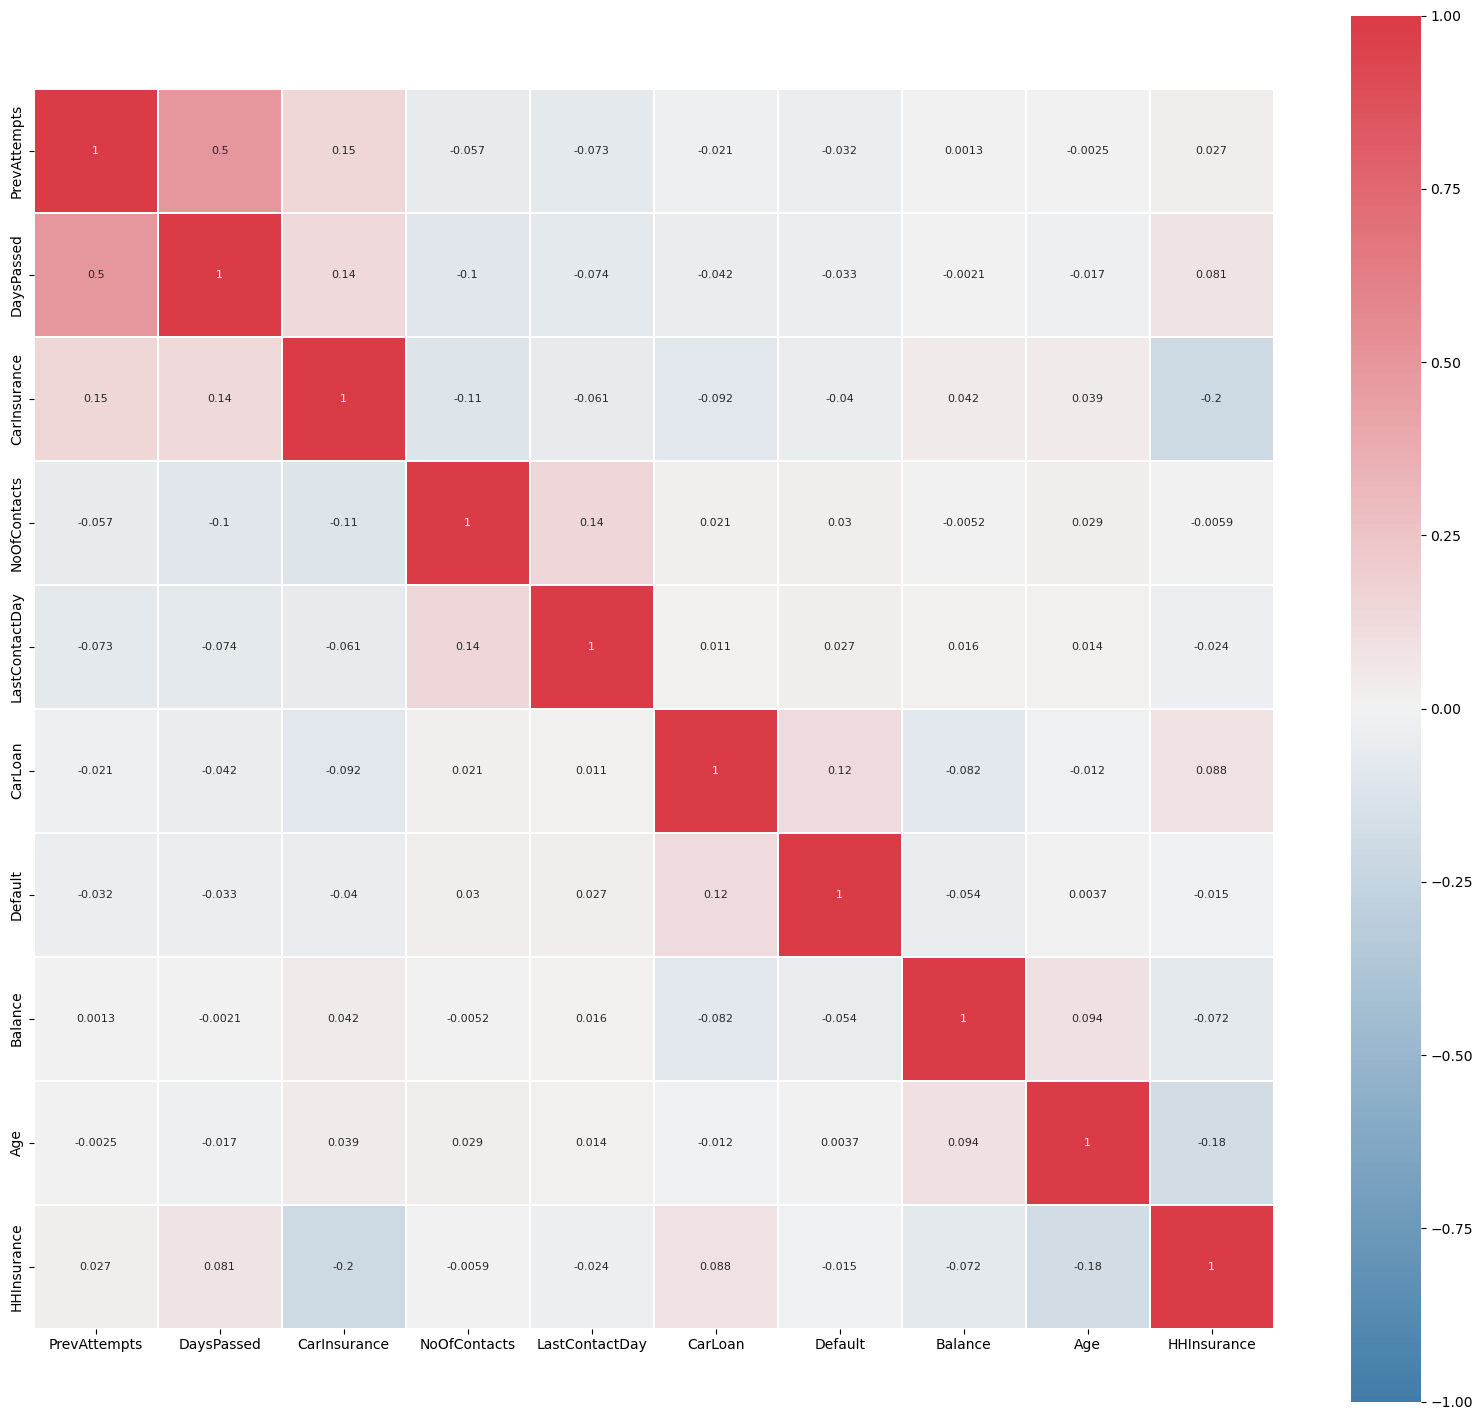

In [9]:
heatmap_corr(data_train, sort = True, annot = True)

### The features exhibit a relatively high degree of independence, with the exception of DaysPassed and PreAttempts. Successful cold calls are associated with positive correlations with PreAttempts, DaysPassed, Age, and Balance. Conversely, there are negative correlations with default, HHInsurance, CarLoan, LastContactDay, and NoOfContacts.

---------------------------------

<AxesSubplot:xlabel='Marital', ylabel='CarInsurance'>

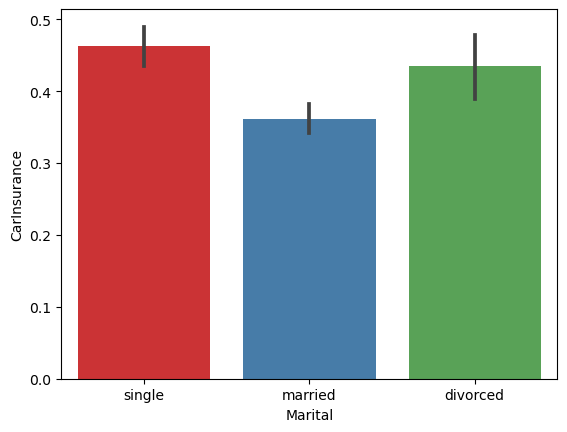

In [10]:
sns.barplot('Marital','CarInsurance', data=data_train, palette='Set1')

### MARRIED PEOPLE ARE LESS LIKELY IN PURCHASING CAR INSURANCE. WE CAN PROPSOSE OR COME UP WITH SOME FAMILY INSURANCE PLAN WHICH CAN LEAD TO INCREASE IN PURCHASING OF CAR INSURANCE BY THEM. 

------------------------

<AxesSubplot:xlabel='LastContactMonth', ylabel='CarInsurance'>

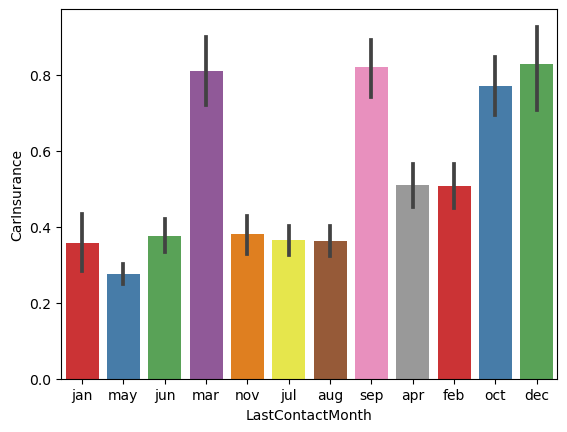

In [11]:
sns.barplot('LastContactMonth','CarInsurance', data=data_train, palette='Set1')

### MARCH, SEPTEMBER, OCTOBER AND DECEMBER ARE THE MAIN MONTHS WHEREAS MAY IS THE LOWEST

-----------------------------------

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'management'),
  Text(1, 0, 'blue-collar'),
  Text(2, 0, 'student'),
  Text(3, 0, 'technician'),
  Text(4, 0, 'admin.'),
  Text(5, 0, 'services'),
  Text(6, 0, 'self-employed'),
  Text(7, 0, 'retired'),
  Text(8, 0, 'housemaid'),
  Text(9, 0, 'entrepreneur'),
  Text(10, 0, 'unemployed')])

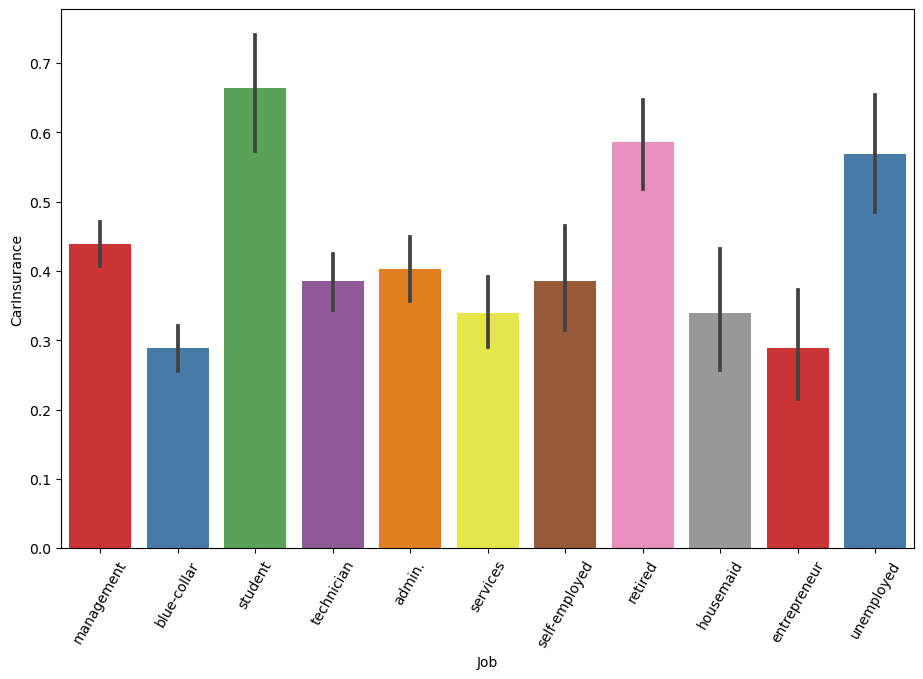

In [12]:
plt.figure(figsize=(11,7))
sns.barplot('Job','CarInsurance', data=data_train, palette='Set1')
plt.xticks(rotation=60)

### HERE WE CAN SEE THAT THE HIGHEST NUMBER OF CAR INSURANCE IS BY STUDENTS AND THEN BY RETIRED PEOPLE. WE CAN TARGET MORE PROMOTIONS TOWARDS THE STUDENTS TO FURTHER INCREASE THIS. THERE MAY BE SOME ALIGNMENT WITH AGE AND PURCHASING OF CAR INSURANCE.

----------------------------------------

<AxesSubplot:xlabel='Education', ylabel='CarInsurance'>

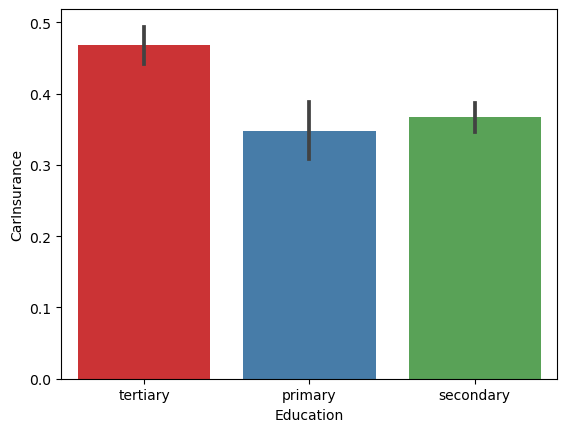

In [13]:
sns.barplot('Education','CarInsurance', data=data_train, palette='Set1')

### WE CAN SEE THAT HIGHER THE EDUCATION LEVEL THE MORE THEY BUY CAR INSURANCE.

----------------------------

<AxesSubplot:xlabel='Outcome', ylabel='CarInsurance'>

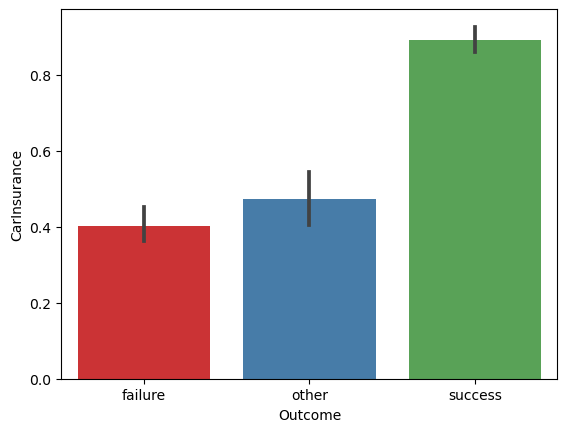

In [14]:
sns.barplot('Outcome','CarInsurance', data=data_train, palette='Set1')

### THE PREVIOUS MARKETING CAMPAIGN OUTCOME WAS A SUCCESS

--------------------------

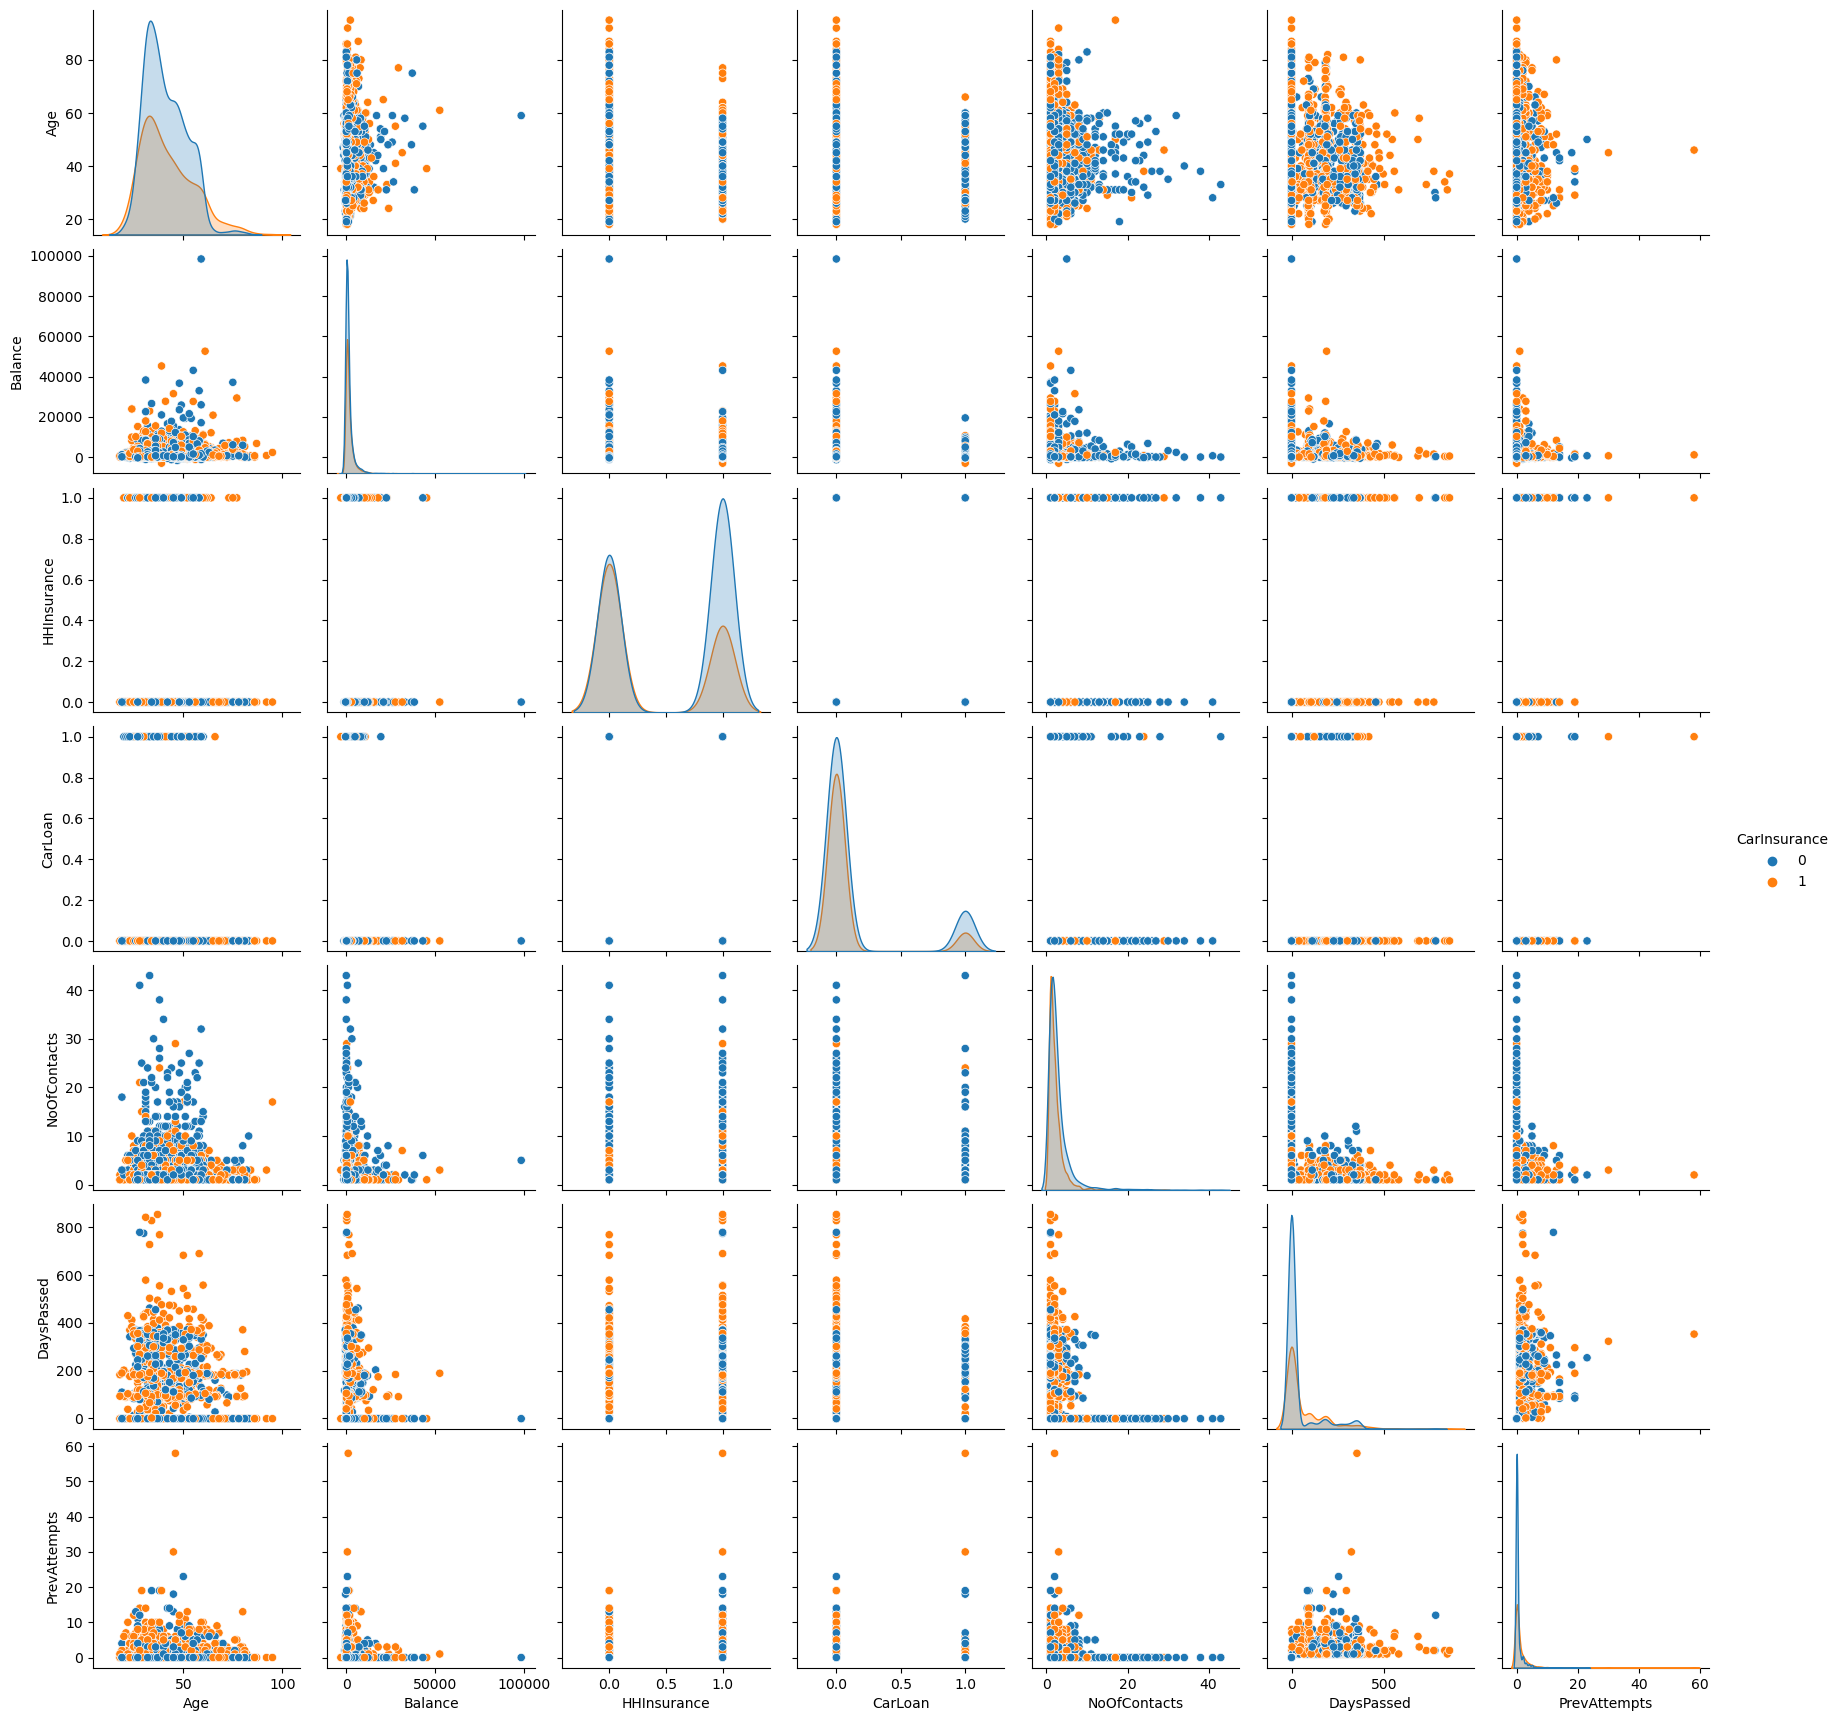

In [15]:
features = ['CarInsurance','Age','Balance','HHInsurance', 'CarLoan','NoOfContacts','DaysPassed','PrevAttempts']
sns.pairplot(data_train[features], hue='CarInsurance', size=2.5)
plt.show()

### AGE: IN AGE WE CAN SEE THAT SENIORS ARE MORE LIKELY BUY CAR INSURANCE
### HHInsurance: INSURED HOUSEHOLDS ARE LESS LIKELY TO BUY CAR INSURANCE
### CarLoan: PEOPLE WHO HAVE CAR LOAN ARE LESS LIKELY TO BUY CAR INSURANCE
### NoOfContacts: HIGH NUMBER OF CONTACTS REDUCES EFFECTIVENESS OF MARKETING CAMPAIGN
### DaysPassed: AFTER THE LAST CONTACT THE NUMBER OF DAYS PASSED IF HIGHER SEEMS TO BE BETTER COMPARED TO NUMBER OF DAYS PASSED IS LOW.
### PrevAttempts: HIGHER PREVIOUS ATTEMPTS TURNS OUT TO BE LESS LIKELINESS IN BUYING.

-------------------------

### CHECKING AND IMPUTING NULL VALUES

In [16]:
data_train.isnull().sum()

Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [17]:
# Imputing frontfill to fill the missing values in Job and Education fields
data_train['Job'] = data_train['Job'].fillna(method ='pad')
data_train['Education'] = data_train['Education'].fillna(method ='pad')

# Imputing none to fill Nan values in Communication and Outcome fields
data_train['Communication'] = data_train['Communication'].fillna('none')
data_train['Outcome'] = data_train['Outcome'].fillna('none')

In [19]:
#Converting CallStart and CallEnd to datetime datatype
data_train['CallStart'] = pd.to_datetime(data_train['CallStart'] )
data_train['CallEnd'] = pd.to_datetime(data_train['CallEnd'] )
#Subtracting both the Start and End times to arrive at the actual CallTime
data_train['CallTime'] = (data_train['CallEnd'] - data_train['CallStart']).dt.total_seconds()

#Binning the CallTime
data_train['CallTimeBinned'] = pd.qcut(data_train['CallTime'], 5,labels = False)

In [20]:
# Using get_dummies function to assign binary values to each value in the categorical column
Job = pd.get_dummies(data = data_train['Job'],prefix = "Job")
Marital= pd.get_dummies(data = data_train['Marital'],prefix = "Marital")
Education= pd.get_dummies(data = data_train['Education'],prefix="Education")
Communication = pd.get_dummies(data = data_train['Communication'],prefix = "Communication")
LastContactMonth = pd.get_dummies(data = data_train['LastContactMonth'],prefix= "LastContactMonth")
Outcome = pd.get_dummies(data = data_train['Outcome'],prefix = "Outcome")

In [21]:
# Dropping the categorical columns which have been assigned dummies
data_train.drop(['Job','Marital','Education','Communication','LastContactMonth','Outcome'],axis=1,inplace=True)

In [22]:
#Concatenating the dataframe with the categorical dummy columns
train = pd.concat([data_train,Job,Marital,Education,Communication,LastContactMonth,Outcome],axis=1)

In [23]:
train.drop(['CallStart','CallEnd','CallTime'],axis = 1,inplace = True)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      4000 non-null   int64
 1   Default                  4000 non-null   int64
 2   Balance                  4000 non-null   int64
 3   HHInsurance              4000 non-null   int64
 4   CarLoan                  4000 non-null   int64
 5   LastContactDay           4000 non-null   int64
 6   NoOfContacts             4000 non-null   int64
 7   DaysPassed               4000 non-null   int64
 8   PrevAttempts             4000 non-null   int64
 9   CarInsurance             4000 non-null   int64
 10  CallTimeBinned           4000 non-null   int64
 11  Job_admin.               4000 non-null   uint8
 12  Job_blue-collar          4000 non-null   uint8
 13  Job_entrepreneur         4000 non-null   uint8
 14  Job_housemaid            4000 non-null   uint8
 15  Job_

In [25]:
# Dropping the Target for X
X= train.drop(['CarInsurance'],axis=1)
# Including only the Target for y
y=train['CarInsurance'].values

#Splitting the Training and Testing data having 20% of Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42, stratify = y)

In [26]:
#Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(X_train,y_train)
print ("Logistic Accuracy is %2.2f" % accuracy_score(y_test, LR.predict(X_test)))
score_LR = cross_val_score(LR, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_LR)
y_pred = LR.predict(X_test)
print(classification_report(y_test, y_pred))
# Confusion matrix for LR
cm = confusion_matrix(y_test,y_pred)

Logistic Accuracy is 0.77
Cross Validation Score = 0.77
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       479
           1       0.70      0.74      0.72       321

    accuracy                           0.77       800
   macro avg       0.76      0.77      0.76       800
weighted avg       0.77      0.77      0.77       800



In [27]:
LR.coef_

array([[-3.07410867e-02, -1.30978094e-02,  5.98458599e-06,
        -3.43493405e-01, -1.06316627e-01, -4.43048381e-02,
        -6.17446492e-02, -2.95364287e-04,  1.90807339e-01,
         1.01548712e+00, -9.91188654e-03, -1.61844286e-01,
        -2.02147474e-02, -6.24396819e-03,  1.97812077e-02,
         8.76931049e-02, -8.76248776e-03, -3.38000165e-02,
         3.88088667e-02, -1.37034870e-02,  1.84740152e-02,
         2.18981413e-02, -1.27623904e-01,  1.60020779e-02,
        -4.99525170e-02, -1.09328665e-01,  6.95574973e-02,
         1.31514813e-01, -2.68332806e-01,  4.70943088e-02,
         4.73130584e-02, -2.27924120e-02,  2.17188369e-02,
         2.54467700e-02, -1.65607486e-02, -1.67648497e-02,
        -2.65054084e-02,  4.74485389e-02, -2.35776996e-01,
        -3.00239468e-02,  6.80762213e-02,  4.86972515e-02,
        -8.15259227e-02, -1.78679480e-01, -1.95558416e-02,
         1.90037560e-01]])

In [28]:
var = X.columns

# PRINTING THE COEFFICIENTS OF THE MODEL
for i in range(0, len(LR.coef_[0])):
    
   
    print("coefficient for variable {}  \t --->  \t {}" .format(var[i], LR.coef_[0][i]))
    

    

# PRINTING INTERCEPT OF THE EQUATION
print("\nintercept of the equation ---> \t {}".format(LR.intercept_[0]))

coefficient for variable Age  	 --->  	 -0.030741086684805775
coefficient for variable Default  	 --->  	 -0.01309780937514138
coefficient for variable Balance  	 --->  	 5.984585994375007e-06
coefficient for variable HHInsurance  	 --->  	 -0.34349340482849455
coefficient for variable CarLoan  	 --->  	 -0.1063166273250678
coefficient for variable LastContactDay  	 --->  	 -0.04430483812244324
coefficient for variable NoOfContacts  	 --->  	 -0.06174464916895139
coefficient for variable DaysPassed  	 --->  	 -0.0002953642873193621
coefficient for variable PrevAttempts  	 --->  	 0.19080733909076147
coefficient for variable CallTimeBinned  	 --->  	 1.0154871243837698
coefficient for variable Job_admin.  	 --->  	 -0.009911886537362401
coefficient for variable Job_blue-collar  	 --->  	 -0.16184428569653508
coefficient for variable Job_entrepreneur  	 --->  	 -0.02021474736111812
coefficient for variable Job_housemaid  	 --->  	 -0.006243968191031985
coefficient for variable Job_manage

In [29]:
odds_ratio = np.exp(LR.coef_)

In [30]:
odds_ratio

array([[0.96972662, 0.98698759, 1.00000598, 0.70928816, 0.89913991,
        0.95666229, 0.94012292, 0.99970468, 1.21022627, 2.76070788,
        0.99013707, 0.85057364, 0.9799882 , 0.99377548, 1.01997815,
        1.09165305, 0.99127579, 0.96676482, 1.03957177, 0.98638998,
        1.01864572, 1.02213967, 0.88018435, 1.0161308 , 0.95127459,
        0.89643574, 1.0720337 , 1.1405548 , 0.76465326, 1.04822086,
        1.04845018, 0.97746537, 1.02195641, 1.0257733 , 0.98357563,
        0.9833749 , 0.97384278, 1.04859224, 0.78995682, 0.97042229,
        1.0704469 , 1.04990245, 0.92170882, 0.83637393, 0.98063413,
        1.20929502]])

In [31]:
var = X.columns

# PRINTING THE ODDS RATIO OF THE MODEL
for i in range(0, len(odds_ratio[0])):
    
   
    print("odds ratio for variable {}  \t --->  \t {}" .format(var[i], odds_ratio[0][i]))

odds ratio for variable Age  	 --->  	 0.9697266157083886
odds ratio for variable Default  	 --->  	 0.9869875936592314
odds ratio for variable Balance  	 --->  	 1.000005984603902
odds ratio for variable HHInsurance  	 --->  	 0.7092881590060525
odds ratio for variable CarLoan  	 --->  	 0.8991399107356938
odds ratio for variable LastContactDay  	 --->  	 0.9566622858839544
odds ratio for variable NoOfContacts  	 --->  	 0.9401229173120117
odds ratio for variable DaysPassed  	 --->  	 0.9997046793284174
odds ratio for variable PrevAttempts  	 --->  	 1.2102262663262762
odds ratio for variable CallTimeBinned  	 --->  	 2.760707878008889
odds ratio for variable Job_admin.  	 --->  	 0.9901370743116811
odds ratio for variable Job_blue-collar  	 --->  	 0.8505736407108713
odds ratio for variable Job_entrepreneur  	 --->  	 0.9799882008283047
odds ratio for variable Job_housemaid  	 --->  	 0.9937754848691984
odds ratio for variable Job_management  	 --->  	 1.0199781522204112
odds ratio f

In [32]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.813833 using {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [34]:
#Logistic Regression Classifier
LR_best = LogisticRegression(C=10, penalty='l2', solver='liblinear')
LR_best.fit(X_train,y_train)
print ("Logistic Accuracy is %2.2f" % accuracy_score(y_test, LR_best.predict(X_test)))
score_LR_best = cross_val_score(LR_best, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_LR_best)
y_pred_best = LR_best.predict(X_test)
print(classification_report(y_test, y_pred_best))
# Confusion matrix for LR
cm_best = confusion_matrix(y_test,y_pred_best)

Logistic Accuracy is 0.83
Cross Validation Score = 0.81
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       479
           1       0.79      0.78      0.79       321

    accuracy                           0.83       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.83      0.83      0.83       800



In [35]:
var = X.columns

# PRINTING THE COEFFICIENTS OF THE MODEL
for i in range(0, len(LR_best.coef_[0])):
    
   
    print("coefficient for variable {}  \t --->  \t {}" .format(var[i], LR_best.coef_[0][i]))
    

    

# PRINTING INTERCEPT OF THE EQUATION
print("\nintercept of the equation ---> \t {}".format(LR_best.intercept_[0]))

coefficient for variable Age  	 --->  	 0.0009534497630675248
coefficient for variable Default  	 --->  	 -0.3078081639276053
coefficient for variable Balance  	 --->  	 -1.2021515043871417e-05
coefficient for variable HHInsurance  	 --->  	 -0.6254640514427497
coefficient for variable CarLoan  	 --->  	 -0.5334456406610256
coefficient for variable LastContactDay  	 --->  	 -0.005919969150944742
coefficient for variable NoOfContacts  	 --->  	 -0.04881395829241425
coefficient for variable DaysPassed  	 --->  	 -0.00018773985934565749
coefficient for variable PrevAttempts  	 --->  	 0.06625864996973431
coefficient for variable CallTimeBinned  	 --->  	 1.2152028417790006
coefficient for variable Job_admin.  	 --->  	 0.25558314933937326
coefficient for variable Job_blue-collar  	 --->  	 -0.46704245286604884
coefficient for variable Job_entrepreneur  	 --->  	 -0.5642097313227492
coefficient for variable Job_housemaid  	 --->  	 -0.34134887175533574
coefficient for variable Job_manageme

In [36]:
odds_ratio_best = np.exp(LR_best.coef_)

In [37]:
var = X.columns

# PRINTING THE ODDS RATIO OF THE MODEL
for i in range(0, len(odds_ratio_best[0])):
    
   
    print("odds ratio for variable {}  \t --->  \t {}" .format(var[i], odds_ratio_best[0][i]))

odds ratio for variable Age  	 --->  	 1.0009539044407856
odds ratio for variable Default  	 --->  	 0.7350563148009213
odds ratio for variable Balance  	 --->  	 0.9999879785572142
odds ratio for variable HHInsurance  	 --->  	 0.5350130973045233
odds ratio for variable CarLoan  	 --->  	 0.5865803385403449
odds ratio for variable LastContactDay  	 --->  	 0.9940975193389707
odds ratio for variable NoOfContacts  	 --->  	 0.9523582915810435
odds ratio for variable DaysPassed  	 --->  	 0.9998122777626789
odds ratio for variable PrevAttempts  	 --->  	 1.0685030497092192
odds ratio for variable CallTimeBinned  	 --->  	 3.370977770105074
odds ratio for variable Job_admin.  	 --->  	 1.2912143721764693
odds ratio for variable Job_blue-collar  	 --->  	 0.6268534781207581
odds ratio for variable Job_entrepreneur  	 --->  	 0.568809481503123
odds ratio for variable Job_housemaid  	 --->  	 0.7108108831039487
odds ratio for variable Job_management  	 --->  	 0.7952383613274644
odds ratio f

In [57]:
train.drop(['Job_housemaid', 'Marital_divorced', 'Education_primary', 'Communication_none', 'LastContactMonth_jan', 'Outcome_none'],axis = 1,inplace = True)

In [59]:
# Dropping the Target for X
X= train.drop(['CarInsurance'],axis=1)
# Including only the Target for y
y=train['CarInsurance'].values

#Splitting the Training and Testing data having 20% of Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42, stratify = y)

In [60]:
log_reg = sm.Logit(y_train, X_train).fit()
print(log_reg.summary()) 

Optimization terminated successfully.
         Current function value: 0.401581
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3200
Model:                          Logit   Df Residuals:                     3160
Method:                           MLE   Df Model:                           39
Date:                Thu, 30 Nov 2023   Pseudo R-squ.:                  0.4036
Time:                        01:13:09   Log-Likelihood:                -1285.1
converged:                       True   LL-Null:                       -2154.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Age                        -0.0262      0.005     -5.117      0.000      -0.036   

In [71]:
odds_ratios = pd.DataFrame(
    {
        "OR": log_reg.params,
        "Lower CI": log_reg.conf_int()[0],
        "Upper CI": log_reg.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)

print(odds_ratios)

                                OR  Lower CI   Upper CI
Age                       0.974169  0.964453   0.983983
Default                   0.626504  0.248023   1.582543
Balance                   0.999992  0.999964   1.000021
HHInsurance               0.466011  0.370891   0.585525
CarLoan                   0.568989  0.419211   0.772279
LastContactDay            0.974040  0.962008   0.986221
NoOfContacts              0.942617  0.898561   0.988832
DaysPassed                1.000058  0.998345   1.001774
PrevAttempts              1.069957  1.001265   1.143361
CallTimeBinned            3.180903  2.905942   3.481880
Job_admin.                0.438696  0.247378   0.777976
Job_blue-collar           0.218519  0.127789   0.373667
Job_entrepreneur          0.213125  0.100372   0.452538
Job_management            0.318031  0.179114   0.564689
Job_retired               0.791363  0.406272   1.541467
Job_self-employed         0.228783  0.110480   0.473768
Job_services              0.290219  0.158842   0

In [66]:
log_reg.pvalues

Age                         3.101695e-07
Default                     3.226422e-01
Balance                     6.104746e-01
HHInsurance                 5.560945e-11
CarLoan                     2.970172e-04
LastContactDay              3.354609e-05
NoOfContacts                1.552757e-02
DaysPassed                  9.471321e-01
PrevAttempts                4.579095e-02
CallTimeBinned             6.984945e-139
Job_admin.                  4.819081e-03
Job_blue-collar             2.756561e-08
Job_entrepreneur            5.727653e-05
Job_management              9.195347e-05
Job_retired                 4.915320e-01
Job_self-employed           7.146970e-05
Job_services                5.748839e-05
Job_student                 1.093758e-01
Job_technician              3.163333e-04
Job_unemployed              2.151044e-02
Marital_married             4.846005e-05
Marital_single              4.411936e-03
Education_secondary         1.458683e-01
Education_tertiary          9.467356e-01
Communication_ce

In [76]:
df = pd.concat([odds_ratios, log_reg.pvalues], axis=1, names=['odds ratio', '0.25', '0.75', 'pvalues'])

In [77]:
df

,OR,Lower CI,Upper CI,0
Age,0.974169,0.964453,0.983983,3.101695e-07
Default,0.626504,0.248023,1.582543,3.226422e-01
Balance,0.999992,0.999964,1.000021,6.104746e-01
HHInsurance,0.466011,0.370891,0.585525,5.560945e-11
CarLoan,0.568989,0.419211,0.772279,2.970172e-04
LastContactDay,0.974040,0.962008,0.986221,3.354609e-05
NoOfContacts,0.942617,0.898561,0.988832,1.552757e-02
DaysPassed,1.000058,0.998345,1.001774,9.471321e-01
PrevAttempts,1.069957,1.001265,1.143361,4.579095e-02
CallTimeBinned,3.180903,2.905942,3.481880,6.984945e-139
